<a href="https://colab.research.google.com/github/mateuszrajca69/r/blob/main/dokonczyc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:

%matplotlib inline

In [70]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import train_test_split


# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.


# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, train_size=0.5)

In [71]:
clf = MLPClassifier(hidden_layer_sizes=(100,100), alpha=0.1,solver='adam',verbose=10,
                    learning_rate_init=0.001, early_stopping=True,validation_fraction=0.2,max_iter=1000)

print(clf.fit(X_train,y_train))
score = clf.score(X_test,y_test)
print('score = {}'.format(score)) 
Z = clf.predict_proba(X_test)[:,1] # returns probability 
print(Z)




Iteration 1, loss = 0.63400598
Validation score: 0.912857
Iteration 2, loss = 0.28655134
Validation score: 0.936714
Iteration 3, loss = 0.23180480
Validation score: 0.947714
Iteration 4, loss = 0.20333938
Validation score: 0.956571
Iteration 5, loss = 0.18180171
Validation score: 0.957714
Iteration 6, loss = 0.16550987
Validation score: 0.963143
Iteration 7, loss = 0.15313919
Validation score: 0.964714
Iteration 8, loss = 0.14189174
Validation score: 0.967857
Iteration 9, loss = 0.13394024
Validation score: 0.965857
Iteration 10, loss = 0.12798326
Validation score: 0.965000
Iteration 11, loss = 0.12086106
Validation score: 0.965429
Iteration 12, loss = 0.11523675
Validation score: 0.967429
Iteration 13, loss = 0.11219463
Validation score: 0.967286
Iteration 14, loss = 0.10872559
Validation score: 0.967000
Iteration 15, loss = 0.10443971
Validation score: 0.969714
Iteration 16, loss = 0.10343307
Validation score: 0.969143
Iteration 17, loss = 0.09887753
Validation score: 0.971286
Iterat

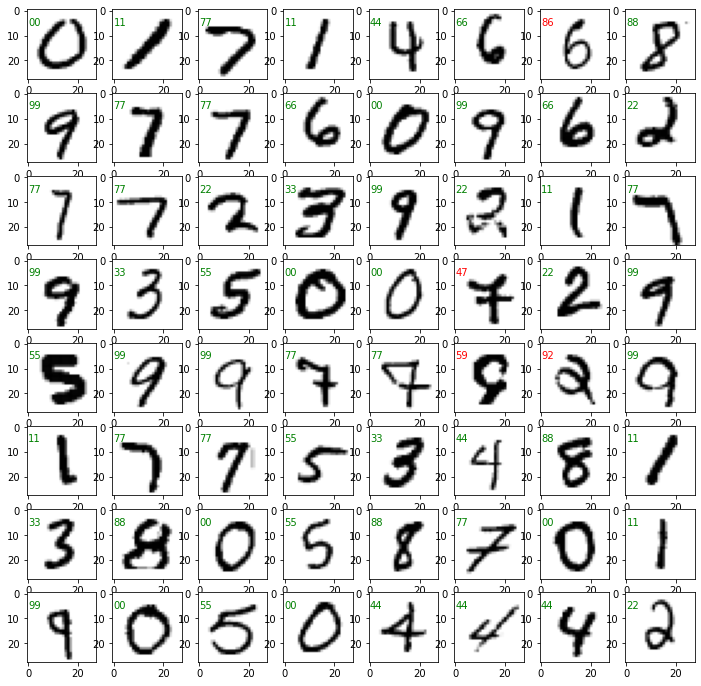

In [72]:
fig=plt.figure(figsize=(12,12))
predicted=clf.predict(X_test)

for i in range(64):
  ax = fig.add_subplot(8,8,i+1)
  ax.imshow(X_test[i].reshape(28,28),cmap=plt.cm.binary)
  if y_test[i]==predicted[i]:
    ax.text(0,6,predicted[i]+''+y_test[i],color="green")
  else:
    ax.text(0,6,predicted[i]+''+y_test[i],color="red")

  


In [73]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3409
           1       0.98      0.99      0.98      3949
           2       0.97      0.97      0.97      3500
           3       0.96      0.97      0.96      3557
           4       0.97      0.98      0.98      3398
           5       0.97      0.96      0.97      3203
           6       0.98      0.98      0.98      3444
           7       0.97      0.98      0.97      3637
           8       0.96      0.96      0.96      3437
           9       0.98      0.95      0.96      3466

    accuracy                           0.97     35000
   macro avg       0.97      0.97      0.97     35000
weighted avg       0.97      0.97      0.97     35000



In [74]:
print(metrics.confusion_matrix(y_test, predicted))

[[3365    0    3    3    1    8   13    4   10    2]
 [   1 3897   20    6    6    1    4    6    7    1]
 [  10    4 3405   15   16    1    7   33    8    1]
 [   0    5   21 3439    0   26    1   20   35   10]
 [   3    7    7    0 3336    0    8   10    5   22]
 [   9    8    5   49    4 3085   11    2   22    8]
 [   8    8    2    0   15   16 3373    0   22    0]
 [   4   11   20    9   19    3    0 3554    3   14]
 [   5   28   15   29    9   13    9    6 3314    9]
 [  11   11    2   27   35   25    2   42   22 3289]]


In [76]:
####################################################
# Load dataset with faces
from sklearn.datasets import fetch_lfw_people

# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=100, resize=0.50)  
print(lfw_people.images.shape)


# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
# to get real names, not digits
target_names = lfw_people.target_names

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

print("Image shape: ",X_train.shape)
# dimension of face image
nfaces, h, w = lfw_people.images.shape
print("Image shape: ", h, w)

(1140, 62, 47)
Image shape:  (855, 2914)
Image shape:  62 47


In [78]:
# tu rysujemy twarze
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 16)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(100):
ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
ax.imshow(X_test[i].reshape(h,w), cmap=plt.cm.gray, interpolation='nearest')
# label the image with the target value
ax.text(0, 7, str(target_names[y_test[i]]))

IndentationError: ignored